#pip install notebook


In [ ]:
pip install notebook


#Import libraries
Initially, import all necessary libraries for data analysis, visualization and modeling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm
import datetime

# Using yfinance to download historical stock data for analysis.

In [ ]:
# Download historical data for a set of stocks
tickers = ['AAPL', 'GOOG', 'AMZN']
start_date = '2023-01-01'
end_date = '2023-12-31'

In [ ]:
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%%**********************]  3 of 3 completed


In [ ]:
# Calculate daily returns
returns = data.pct_change().dropna()

returns.head()

Ticker,AAPL,AMZN,GOOG
Date,,,
2023-01-04,0.010314,-0.007924,-0.011037
2023-01-05,-0.010605,-0.023726,-0.021869
2023-01-06,0.036794,0.035611,0.016019
2023-01-09,0.004089,0.014870,0.007259
2023-01-10,0.004456,0.028732,0.004955


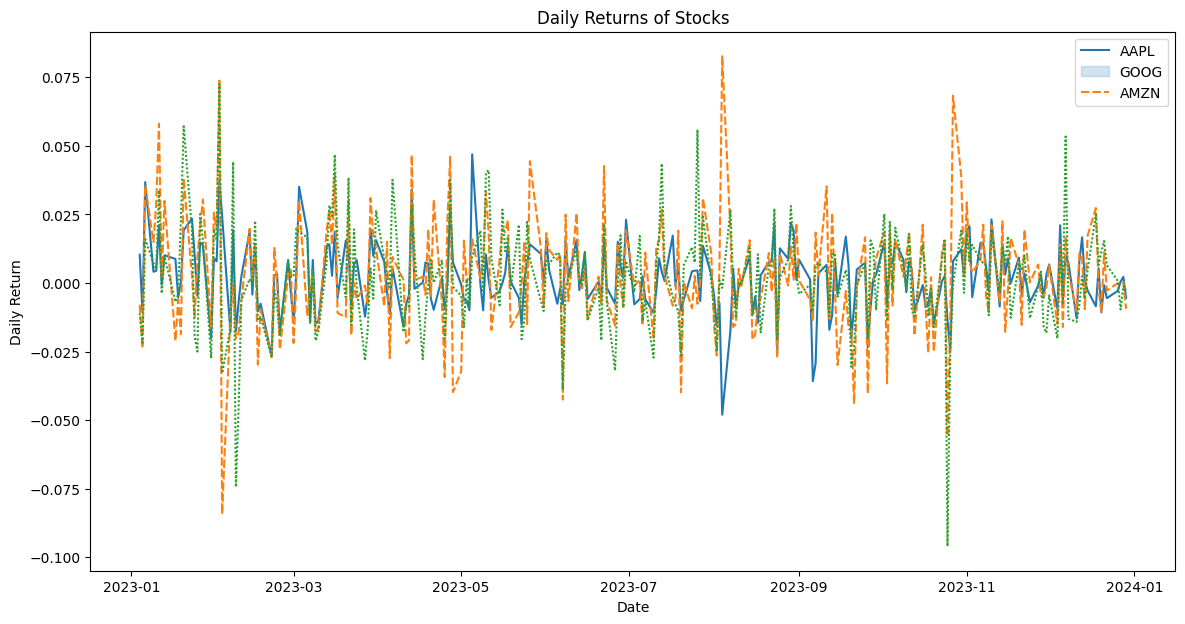

In [ ]:
# Basic Exploratory Data Analysis
plt.figure(figsize=(14, 7))
sns.lineplot(data=returns)
plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend(tickers)
plt.show()

In [ ]:
# Calculate risk metrics
mean_returns = returns.mean()
volatility = returns.std()
print(f'Mean Returns:\n{mean_returns}\n')
print(f'Volatility (Standard Deviation):\n{volatility}\n')

Mean Returns:
Ticker
A   -0.000135
G   -0.001054
Z    0.002550
dtype: float64

Volatility (Standard Deviation):
Ticker
A    0.016905
G    0.015471
Z    0.027600
dtype: float64



#Calculate Value at Risk (VaR) and Conditional Value at Risk(CVaR)

In [ ]:
# Calculate Value at Risk (VaR) at 95% confidence level
VaR_95 = returns.quantile(0.05)
print(f'Value at Risk (VaR) at 95% confidence level:\n{VaR_95}\n')

Value at Risk (VaR) at 95% confidence level:
Ticker
AAPL   -0.017176
AMZN   -0.027312
GOOG   -0.026082
Name: 0.05, dtype: float64



In [ ]:
# Calculate Conditional Value at Risk (CVaR) at 95% confidence level
CVaR_95 = returns[returns < VaR_95].mean()
print(f'Conditional Value at Risk (CVaR) at 95% confidence level:\n{CVaR_95}\n')

Conditional Value at Risk (CVaR) at 95% confidence level:
Ticker
AAPL   -0.024987
AMZN   -0.041295
GOOG   -0.039543
dtype: float64



#Volatility Prediction using ARIMA

In [ ]:
# Fit ARIMA model for volatility prediction
stock = 'AAPL'
returns_stock = returns[stock]

In [ ]:
model = ARIMA(returns_stock, order=(5,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  249
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 715.882
Date:                Mon, 24 Jun 2024   AIC                          -1419.764
Time:                        06:56:51   BIC                          -1398.683
Sample:                             0   HQIC                         -1411.278
                                - 249                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7428      0.069    -10.810      0.000      -0.877      -0.608
ar.L2         -0.6225      0.070     -8.830      0.000      -0.761      -0.484
ar.L3         -0.4045      0.076     -5.351      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


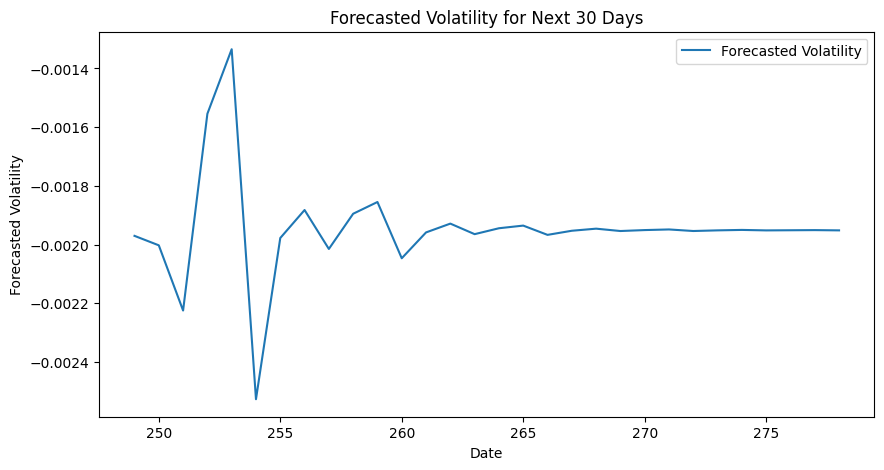

In [ ]:
# Forecast volatility
forecast_volatility = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(forecast_volatility, label='Forecasted Volatility')
plt.title('Forecasted Volatility for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Forecasted Volatility')
plt.legend()
plt.show()

#Regression Model for predicting returns
Prepare the dataset, split into training and testing sets, and train a linear regression model.



In [ ]:
# Prepare data for regression model
returns_shifted = returns.shift(-1).dropna()
X = returns[:-1]
y = returns_shifted['AAPL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict and evaluate
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.0001300148519833558
R2 Score: -0.05338460533128453


#Visualization of Actual vs Returns

<Figure size 1400x700 with 0 Axes>

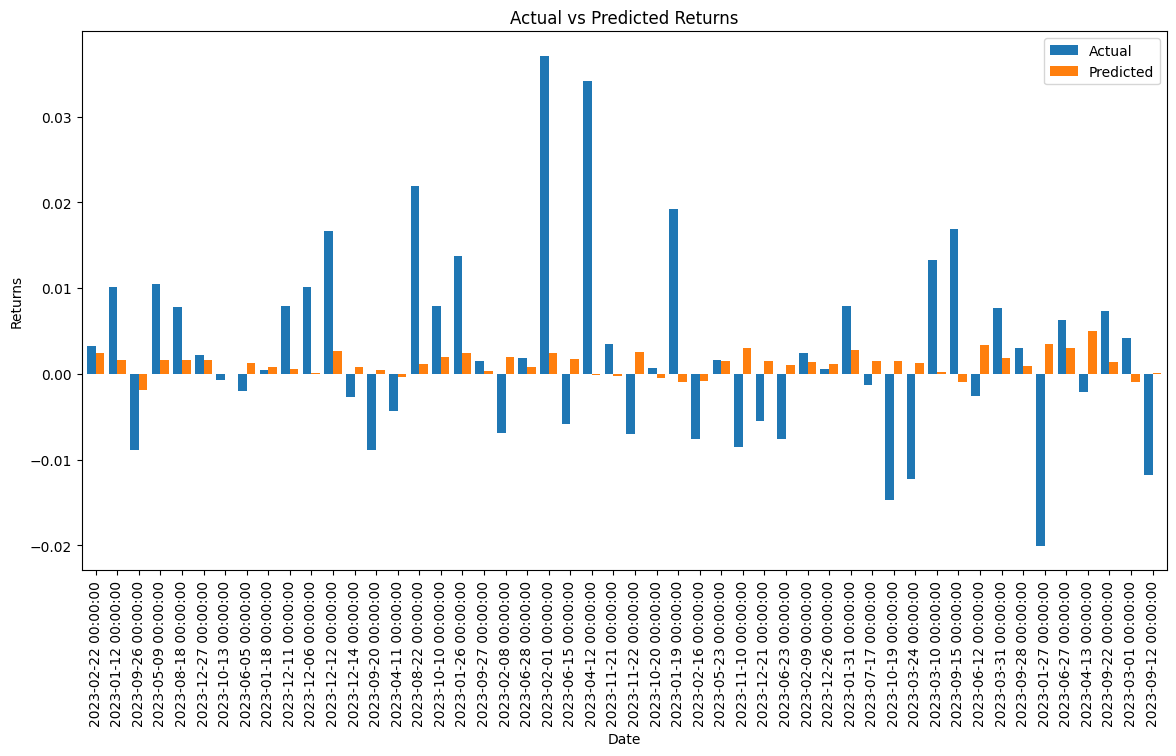

In [ ]:
# Plotting predictions vs actual using a bar plot
plt.figure(figsize=(14, 7))

# Create a DataFrame to hold the actual and predicted returns
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}, index=y_test.index)

# Plot the bar plot
comparison_df.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title('Actual vs Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

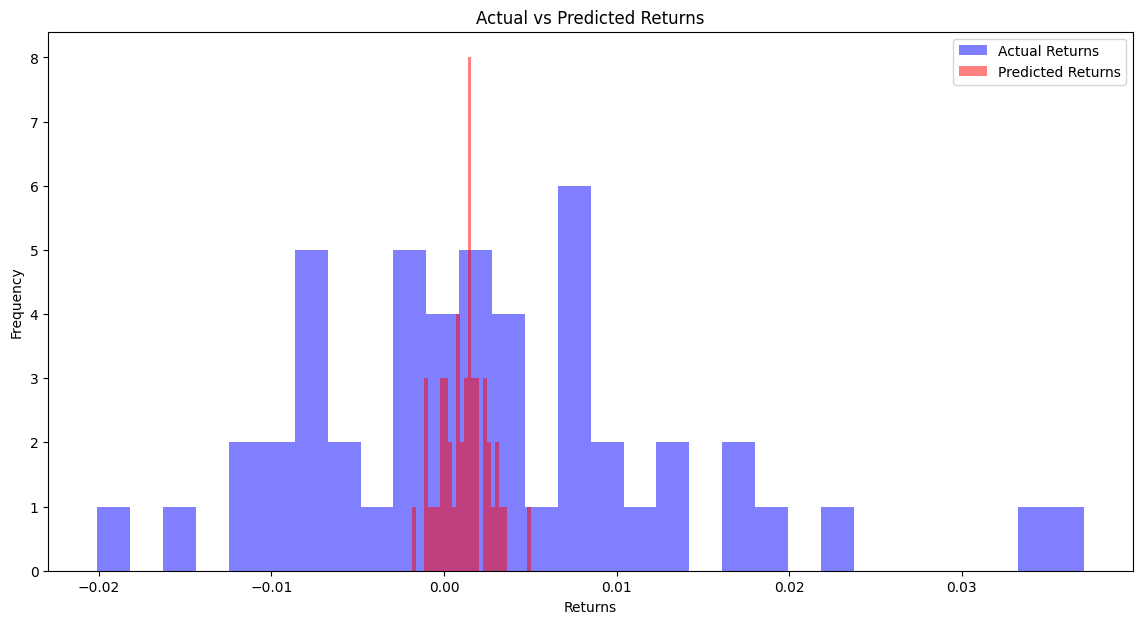

In [ ]:
# Plotting predictions vs actual using a histogram plot
plt.figure(figsize=(14, 7))

# Plot histogram for actual returns
plt.hist(y_test, bins=30, alpha=0.5, label='Actual Returns', color='b')

# Plot histogram for predicted returns
plt.hist(y_pred, bins=30, alpha=0.5, label='Predicted Returns', color='r')

plt.title('Actual vs Predicted Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

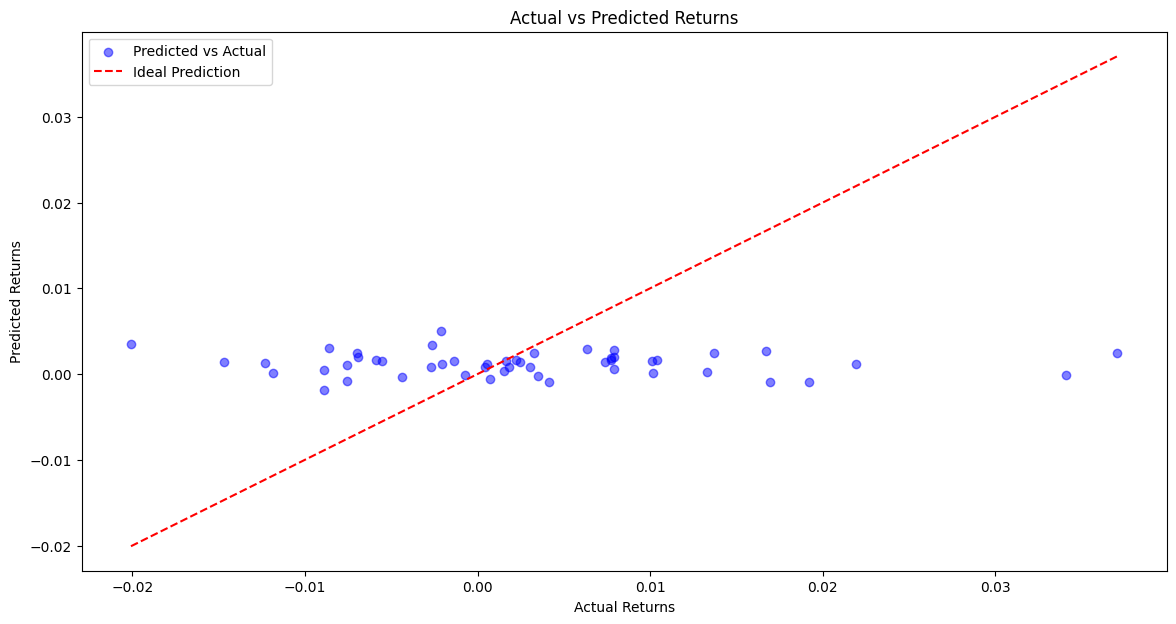

In [ ]:
# Plotting predictions vs actual using a scatter plot
plt.figure(figsize=(14, 7))

# Scatter plot for actual vs predicted returns
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual', color='b')

# Plotting the diagonal line (ideal prediction line)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')

plt.title('Actual vs Predicted Returns')
plt.xlabel('Actual Returns')
plt.ylabel('Predicted Returns')
plt.legend()
plt.show()

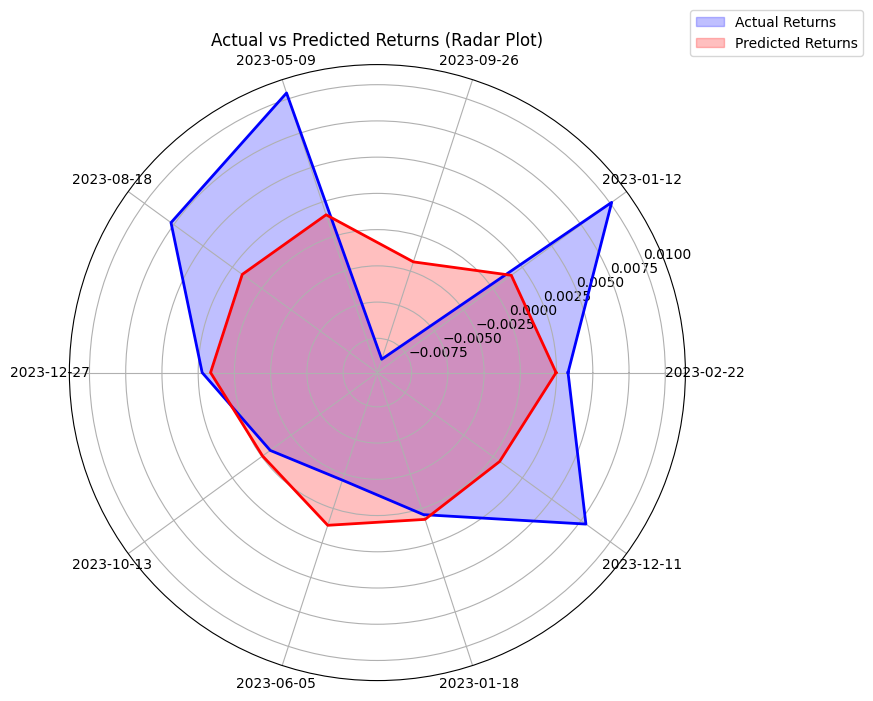

In [ ]:
# Plotting predictions vs actual using a radar plot
# Select a subset of dates for the radar plot
subset_size = 10
subset_dates = y_test.index[:subset_size]
subset_actual = y_test.values[:subset_size]
subset_predicted = y_pred[:subset_size]

# Number of variables
num_vars = len(subset_dates)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar plot requires the data to be closed
subset_actual = np.concatenate((subset_actual, [subset_actual[0]]))
subset_predicted = np.concatenate((subset_predicted, [subset_predicted[0]]))
angles += angles[:1]

# Plot the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

ax.fill(angles, subset_actual, color='blue', alpha=0.25, label='Actual Returns')
ax.plot(angles, subset_actual, color='blue', linewidth=2)

ax.fill(angles, subset_predicted, color='red', alpha=0.25, label='Predicted Returns')
ax.plot(angles, subset_predicted, color='red', linewidth=2)

# Add the labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels([str(date.date()) for date in subset_dates])

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.title('Actual vs Predicted Returns (Radar Plot)')
plt.show()

#Portfolio optimization
Optimize the portfolio based on the Sharpe ratio and visualize the efficient frontier.



In [ ]:
# Portfolio Optimization
from scipy.optimize import minimize

In [ ]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return returns, std

In [ ]:
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    p_returns, p_std = portfolio_performance(weights, mean_returns, cov_matrix)
    return - (p_returns - risk_free_rate) / p_std

In [ ]:
def optimize_portfolio(mean_returns, cov_matrix, risk_free_rate=0.01):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for asset in range(num_assets))
    result = minimize(negative_sharpe_ratio, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [ ]:
mean_returns = returns.mean()
cov_matrix = returns.cov()
optimal_portfolio = optimize_portfolio(mean_returns, cov_matrix)

In [ ]:
optimal_weights = optimal_portfolio['x']
print(f'Optimal Weights: {optimal_weights}')

Optimal Weights: [7.28401938e-01 2.71598062e-01 1.61061763e-18]


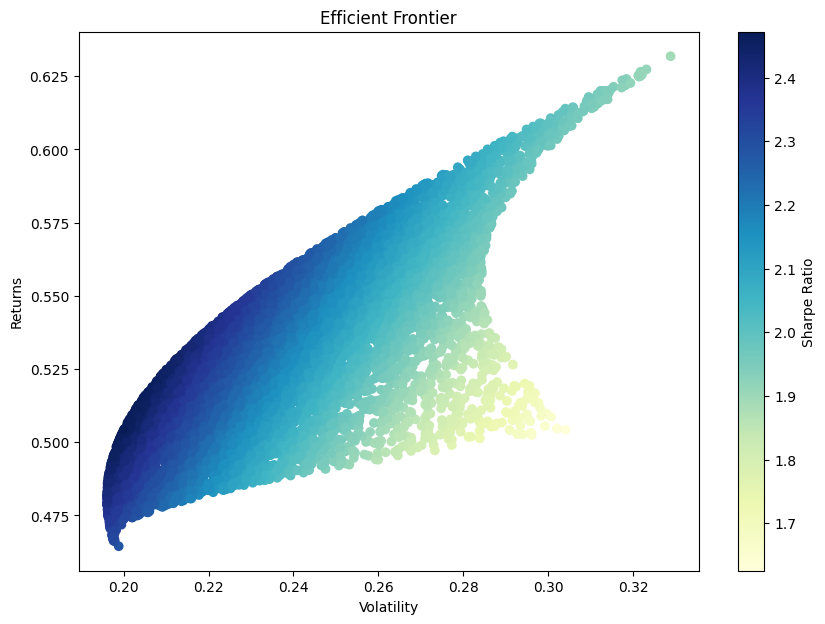

In [ ]:
def plot_efficient_frontier(mean_returns, cov_matrix, num_portfolios=10000, risk_free_rate=0.01):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_return, portfolio_std = portfolio_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std
    return results, weights_record

# Assuming mean_returns and cov_matrix are already defined
results, weights_record = plot_efficient_frontier(mean_returns, cov_matrix)

plt.figure(figsize=(10, 7))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.show()

In [ ]:
plot_efficient_frontier(mean_returns, cov_matrix)

(array([[0.2275298 , 0.25201007, 0.26451103, ..., 0.23492567, 0.2674451 ,
         0.23183914],
        [0.50815454, 0.55170413, 0.56318884, ..., 0.55528191, 0.57687271,
         0.53041214],
        [2.18940344, 2.14953362, 2.09136395, ..., 2.3210827 , 2.11958532,
         2.24471218]]),
 [array([0.39231247, 0.15728086, 0.45040668]),
  array([0.21060043, 0.4368411 , 0.35255847]),
  array([0.13933879, 0.50292534, 0.35773586]),
  array([0.34781727, 0.24823197, 0.40395077]),
  array([0.52239266, 0.29199982, 0.18560752]),
  array([0.62366872, 0.00132097, 0.37501031]),
  array([0.33921924, 0.01264989, 0.64813087]),
  array([0.01047804, 0.84857428, 0.14094769]),
  array([0.379204  , 0.2276394 , 0.39315659]),
  array([0.37007594, 0.60446244, 0.02546162]),
  array([0.0032898 , 0.50902272, 0.48768748]),
  array([0.11646975, 0.34629646, 0.53723378]),
  array([0.05213127, 0.64828422, 0.29958452]),
  array([0.43288498, 0.45118035, 0.11593467]),
  array([0.2182869 , 0.64215146, 0.13956164]),
  arr